In [1]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.externals import joblib
print('Libraries Imported')

Libraries Imported


In [2]:
training_data = pd.read_csv("train-1542197608821.csv")
training_data.head()

,rally,serve,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,outside.baseline,player.distance.travelled,...,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,outcome,gender,ID
0,4,1,B,35.515042,-0.021725,3.474766,6.797621,False,False,1.467570,...,0.705435,12.5628,2.0724,True,F,0.445318,False,UE,mens,8644
1,4,2,B,33.382640,1.114202,2.540801,2.608708,False,True,2.311931,...,3.856600,12.3544,5.1124,False,B,0.432434,False,FE,mens,1182
2,23,1,B,22.316690,-0.254046,3.533166,9.435749,False,False,3.903728,...,2.908892,13.8620,1.6564,False,F,0.397538,True,FE,mens,9042
3,9,1,F,36.837309,0.766694,0.586885,3.342180,True,False,0.583745,...,0.557554,14.2596,0.1606,True,B,0.671984,True,UE,mens,1222
4,4,1,B,35.544208,0.116162,0.918725,5.499119,False,False,2.333456,...,3.945317,11.3658,1.1082,False,F,0.340411,False,W,mens,4085


In [3]:
training_data.rename(columns={'net.clearance': 'netClearance', 'outside.sideline': 'outsideSideline', 'outside.baseline': 'outsideBaseline'}, inplace=True)
training_data.columns.values

array(['rally', 'serve', 'hitpoint', 'speed', 'netClearance',
       'distance.from.sideline', 'depth', 'outsideSideline',
       'outsideBaseline', 'player.distance.travelled',
       'player.impact.depth', 'player.impact.distance.from.center',
       'player.depth', 'player.distance.from.center', 'previous.speed',
       'previous.net.clearance', 'previous.distance.from.sideline',
       'previous.depth', 'opponent.depth',
       'opponent.distance.from.center', 'same.side', 'previous.hitpoint',
       'previous.time.to.net', 'server.is.impact.player', 'outcome',
       'gender', 'ID'], dtype=object)

In [4]:
training_data.dtypes

rally                                   int64
serve                                   int64
hitpoint                               object
speed                                 float64
netClearance                          float64
distance.from.sideline                float64
depth                                 float64
outsideSideline                          bool
outsideBaseline                          bool
player.distance.travelled             float64
player.impact.depth                   float64
player.impact.distance.from.center    float64
player.depth                          float64
player.distance.from.center           float64
previous.speed                        float64
previous.net.clearance                float64
previous.distance.from.sideline       float64
previous.depth                        float64
opponent.depth                        float64
opponent.distance.from.center         float64
same.side                                bool
previous.hitpoint                 

# Dropping Incorrect records from train data - for better training model

# # They are:
### a.) When net.clearance < 0 and outcome == W : 48 Such RECORDS. 
### b.) When outside.baseline=TRUE, then it is a error, ending rally, so remove records where Outcome == W and outside.baseline == True : 20 Such Records
### c.) When outside.sidelline == TRUE and Outcome == Winner : 9 records 

In [5]:
training_data.shape

(8001, 27)

In [6]:
training_data[(training_data.outcome == 'W') & (training_data.netClearance < 0.0)].count()

rally                                 48
serve                                 48
hitpoint                              48
speed                                 48
netClearance                          48
distance.from.sideline                48
depth                                 48
outsideSideline                       48
outsideBaseline                       48
player.distance.travelled             48
player.impact.depth                   48
player.impact.distance.from.center    48
player.depth                          48
player.distance.from.center           48
previous.speed                        48
previous.net.clearance                48
previous.distance.from.sideline       48
previous.depth                        48
opponent.depth                        48
opponent.distance.from.center         48
same.side                             48
previous.hitpoint                     48
previous.time.to.net                  48
server.is.impact.player               48
outcome         

In [7]:
training_data.drop(training_data[ (training_data.outcome == 'W') & (training_data.netClearance < 0.0)].index, inplace=True)

In [8]:
training_data.shape

(7953, 27)

In [9]:
training_data[ (training_data.outcome == 'W') & (training_data.outsideBaseline) ]

,rally,serve,hitpoint,speed,netClearance,distance.from.sideline,depth,outsideSideline,outsideBaseline,player.distance.travelled,...,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,outcome,gender,ID
137,4,2,B,38.067721,0.503376,1.247838,0.054719,False,True,2.944265,...,4.097003,12.6572,1.7902,False,F,0.492360,False,W,mens,547
401,6,2,F,39.912138,0.617764,1.482524,0.080177,False,True,2.018518,...,4.546583,13.1684,3.2348,False,F,0.502348,False,W,mens,4789
740,18,2,F,37.057220,0.991396,0.657036,0.057976,False,True,3.502804,...,5.202198,14.5712,2.4410,True,F,0.503091,False,W,mens,8281
1138,3,1,F,39.196247,0.955831,0.126016,0.100417,False,True,0.802088,...,4.565487,11.8836,3.8290,False,F,0.733682,True,W,mens,6528
1278,9,2,B,20.738478,1.241219,0.561777,0.617471,False,True,0.000000,...,0.481118,10.7796,2.4882,False,B,0.470535,True,W,mens,2686
1639,9,1,B,37.787812,0.687539,1.042705,0.112662,False,True,2.957832,...,6.321104,11.8122,2.5300,False,F,0.564786,True,W,mens,3887
1773,4,1,F,41.526229,0.637051,0.604297,4.010822,True,True,3.486108,...,5.653233,13.3300,4.1098,False,F,0.423889,False,W,mens,1174
1836,6,1,F,41.125927,0.707137,0.788713,0.116381,False,True,3.937907,...,4.603407,13.2816,2.5690,False,B,0.887937,False,W,mens,3481
2811,14,2,F,38.017521,0.602595,0.214654,0.086217,False,True,5.488942,...,7.078490,14.0284,2.7740,True,B,0.763738,False,W,mens,6390
2990,6,2,B,41.096861,0.543494,1.023181,0.071144,False,True,3.634182,...,4.573088,13.4470,0.7546,False,F,0.520972,False,W,mens,8314


In [10]:
training_data.drop(training_data[ (training_data.outcome == 'W') & (training_data.outsideBaseline)].index, inplace=True)
training_data.shape

(7933, 27)

In [11]:
training_data[ (training_data.outcome == 'W') & (training_data.outsideSideline) ]

,rally,serve,hitpoint,speed,netClearance,distance.from.sideline,depth,outsideSideline,outsideBaseline,player.distance.travelled,...,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,outcome,gender,ID
365,3,1,B,38.101442,0.158981,0.054729,4.938593,True,False,2.327890,...,4.239554,12.6316,4.5510,False,F,0.480285,True,W,mens,6122
4049,8,1,F,22.057119,0.346722,0.598800,2.317013,True,False,5.768883,...,7.969548,3.5462,0.2000,True,B,0.445475,False,W,womens,6126
5224,3,1,B,30.396477,0.476261,0.054853,2.705095,True,False,2.625619,...,4.569675,12.6260,2.7720,False,F,0.501648,True,W,womens,3874
7050,3,1,V,36.741422,0.049600,0.065542,11.845207,True,False,4.079427,...,2.466945,13.5214,3.0082,False,F,0.825738,True,W,womens,6283
7106,7,2,B,25.372404,0.042368,0.057968,6.473309,True,False,1.317925,...,7.270360,12.3918,0.2376,False,V,0.488718,True,W,womens,9700


In [12]:
training_data.drop(training_data[ (training_data.outcome == 'W') & (training_data.outsideSideline)].index, inplace=True)
training_data.shape

(7928, 27)

# # Thus original training dataset reduced to 7928 records from 8001, 73 deficit i.e. 0.91 % data reduced.
# We are still good as features are 25 to train, which will be reduced based on domain info.


In [13]:
training_data.columns.values

array(['rally', 'serve', 'hitpoint', 'speed', 'netClearance',
       'distance.from.sideline', 'depth', 'outsideSideline',
       'outsideBaseline', 'player.distance.travelled',
       'player.impact.depth', 'player.impact.distance.from.center',
       'player.depth', 'player.distance.from.center', 'previous.speed',
       'previous.net.clearance', 'previous.distance.from.sideline',
       'previous.depth', 'opponent.depth',
       'opponent.distance.from.center', 'same.side', 'previous.hitpoint',
       'previous.time.to.net', 'server.is.impact.player', 'outcome',
       'gender', 'ID'], dtype=object)

In [14]:
training_data.columns.shape

(27,)

In [15]:
# Dropping id and gender and serve from feature set:
## Reason :
### the game of tennis has same scoring irrespective of gender.
### ID is not required
### serve doesn't affect the outcome as the minimum rally no. is 3 ==> All serves are successful.

training_data.drop(['ID','gender', 'serve'], inplace=True, axis=1)
training_data.columns.shape

(24,)

In [16]:
training_data.head()

,rally,hitpoint,speed,netClearance,distance.from.sideline,depth,outsideSideline,outsideBaseline,player.distance.travelled,player.impact.depth,...,previous.net.clearance,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,outcome
0,4,B,35.515042,-0.021725,3.474766,6.797621,False,False,1.467570,14.1758,...,1.350533,2.449182,0.705435,12.5628,2.0724,True,F,0.445318,False,UE
1,4,B,33.382640,1.114202,2.540801,2.608708,False,True,2.311931,12.7396,...,0.760499,0.583291,3.856600,12.3544,5.1124,False,B,0.432434,False,FE
2,23,B,22.316690,-0.254046,3.533166,9.435749,False,False,3.903728,15.3782,...,0.377732,1.115250,2.908892,13.8620,1.6564,False,F,0.397538,True,FE
3,9,F,36.837309,0.766694,0.586885,3.342180,True,False,0.583745,13.7308,...,1.239033,3.256695,0.557554,14.2596,0.1606,True,B,0.671984,True,UE
4,4,B,35.544208,0.116162,0.918725,5.499119,False,False,2.333456,15.1992,...,0.165731,1.431146,3.945317,11.3658,1.1082,False,F,0.340411,False,W


# Converting Types to Categorical

In [17]:
training_data.dtypes

rally                                   int64
hitpoint                               object
speed                                 float64
netClearance                          float64
distance.from.sideline                float64
depth                                 float64
outsideSideline                          bool
outsideBaseline                          bool
player.distance.travelled             float64
player.impact.depth                   float64
player.impact.distance.from.center    float64
player.depth                          float64
player.distance.from.center           float64
previous.speed                        float64
previous.net.clearance                float64
previous.distance.from.sideline       float64
previous.depth                        float64
opponent.depth                        float64
opponent.distance.from.center         float64
same.side                                bool
previous.hitpoint                      object
previous.time.to.net              

In [18]:
training_data[training_data.select_dtypes(['object']).columns] = training_data.select_dtypes(['object']).apply(lambda x: x.astype('category'))
training_data.dtypes

rally                                    int64
hitpoint                              category
speed                                  float64
netClearance                           float64
distance.from.sideline                 float64
depth                                  float64
outsideSideline                           bool
outsideBaseline                           bool
player.distance.travelled              float64
player.impact.depth                    float64
player.impact.distance.from.center     float64
player.depth                           float64
player.distance.from.center            float64
previous.speed                         float64
previous.net.clearance                 float64
previous.distance.from.sideline        float64
previous.depth                         float64
opponent.depth                         float64
opponent.distance.from.center          float64
same.side                                 bool
previous.hitpoint                     category
previous.time

In [19]:
training_data[training_data.select_dtypes(['bool']).columns] = training_data.select_dtypes(['bool']).apply(lambda x: x.astype('category'))
training_data.dtypes

rally                                    int64
hitpoint                              category
speed                                  float64
netClearance                           float64
distance.from.sideline                 float64
depth                                  float64
outsideSideline                       category
outsideBaseline                       category
player.distance.travelled              float64
player.impact.depth                    float64
player.impact.distance.from.center     float64
player.depth                           float64
player.distance.from.center            float64
previous.speed                         float64
previous.net.clearance                 float64
previous.distance.from.sideline        float64
previous.depth                         float64
opponent.depth                         float64
opponent.distance.from.center          float64
same.side                             category
previous.hitpoint                     category
previous.time

# # Proceeding WITH Dummification

In [20]:
#Creating the dependent variable class
factor = pd.factorize(training_data['outcome'])
training_data.outcome = factor[0]
definitions = factor[1]
print(training_data.outcome.head())
print(definitions)

0    0
1    1
2    1
3    0
4    2
Name: outcome, dtype: int64
CategoricalIndex(['UE', 'FE', 'W'], categories=['FE', 'UE', 'W'], ordered=False, dtype='category')


In [21]:
factor

(array([0, 1, 1, ..., 2, 2, 0], dtype=int64),
 CategoricalIndex(['UE', 'FE', 'W'], categories=['FE', 'UE', 'W'], ordered=False, dtype='category'))

In [22]:
training_data[:-1].head()

,rally,hitpoint,speed,netClearance,distance.from.sideline,depth,outsideSideline,outsideBaseline,player.distance.travelled,player.impact.depth,...,previous.net.clearance,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,outcome
0,4,B,35.515042,-0.021725,3.474766,6.797621,False,False,1.467570,14.1758,...,1.350533,2.449182,0.705435,12.5628,2.0724,True,F,0.445318,False,0
1,4,B,33.382640,1.114202,2.540801,2.608708,False,True,2.311931,12.7396,...,0.760499,0.583291,3.856600,12.3544,5.1124,False,B,0.432434,False,1
2,23,B,22.316690,-0.254046,3.533166,9.435749,False,False,3.903728,15.3782,...,0.377732,1.115250,2.908892,13.8620,1.6564,False,F,0.397538,True,1
3,9,F,36.837309,0.766694,0.586885,3.342180,True,False,0.583745,13.7308,...,1.239033,3.256695,0.557554,14.2596,0.1606,True,B,0.671984,True,0
4,4,B,35.544208,0.116162,0.918725,5.499119,False,False,2.333456,15.1992,...,0.165731,1.431146,3.945317,11.3658,1.1082,False,F,0.340411,False,2


In [23]:
training_data.columns.shape

(24,)

In [24]:
# NOT Dropping features  - LETs see the impact
train_data_copy = training_data.copy(deep=False)
#train_data_copy.drop(['hitpoint','previous.hitpoint', 'distance.from.sideline', 'previous.distance.from.sideline', 'previous.time.to.net'], inplace=True, axis=1)
train_data_copy.shape

(7928, 24)

In [25]:
training_data.shape

(7928, 24)

# Work with train_data_copy : Just like that.

In [26]:
train_data_copy.head()

,rally,hitpoint,speed,netClearance,distance.from.sideline,depth,outsideSideline,outsideBaseline,player.distance.travelled,player.impact.depth,...,previous.net.clearance,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,outcome
0,4,B,35.515042,-0.021725,3.474766,6.797621,False,False,1.467570,14.1758,...,1.350533,2.449182,0.705435,12.5628,2.0724,True,F,0.445318,False,0
1,4,B,33.382640,1.114202,2.540801,2.608708,False,True,2.311931,12.7396,...,0.760499,0.583291,3.856600,12.3544,5.1124,False,B,0.432434,False,1
2,23,B,22.316690,-0.254046,3.533166,9.435749,False,False,3.903728,15.3782,...,0.377732,1.115250,2.908892,13.8620,1.6564,False,F,0.397538,True,1
3,9,F,36.837309,0.766694,0.586885,3.342180,True,False,0.583745,13.7308,...,1.239033,3.256695,0.557554,14.2596,0.1606,True,B,0.671984,True,0
4,4,B,35.544208,0.116162,0.918725,5.499119,False,False,2.333456,15.1992,...,0.165731,1.431146,3.945317,11.3658,1.1082,False,F,0.340411,False,2


# Dummification

In [27]:
train_feature_set = train_data_copy.copy(deep=True)
train_feature_set.drop(['outcome'], inplace=True, axis=1)
train_feature_set.head()

,rally,hitpoint,speed,netClearance,distance.from.sideline,depth,outsideSideline,outsideBaseline,player.distance.travelled,player.impact.depth,...,previous.speed,previous.net.clearance,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player
0,4,B,35.515042,-0.021725,3.474766,6.797621,False,False,1.467570,14.1758,...,32.313592,1.350533,2.449182,0.705435,12.5628,2.0724,True,F,0.445318,False
1,4,B,33.382640,1.114202,2.540801,2.608708,False,True,2.311931,12.7396,...,34.060788,0.760499,0.583291,3.856600,12.3544,5.1124,False,B,0.432434,False
2,23,B,22.316690,-0.254046,3.533166,9.435749,False,False,3.903728,15.3782,...,39.806628,0.377732,1.115250,2.908892,13.8620,1.6564,False,F,0.397538,True
3,9,F,36.837309,0.766694,0.586885,3.342180,True,False,0.583745,13.7308,...,25.018818,1.239033,3.256695,0.557554,14.2596,0.1606,True,B,0.671984,True
4,4,B,35.544208,0.116162,0.918725,5.499119,False,False,2.333456,15.1992,...,36.790979,0.165731,1.431146,3.945317,11.3658,1.1082,False,F,0.340411,False


In [28]:
gen_onehot_features = pd.get_dummies(train_feature_set)
gen_onehot_features.head()

,rally,speed,netClearance,distance.from.sideline,depth,player.distance.travelled,player.impact.depth,player.impact.distance.from.center,player.depth,player.distance.from.center,...,outsideBaseline_False,outsideBaseline_True,same.side_False,same.side_True,previous.hitpoint_B,previous.hitpoint_F,previous.hitpoint_U,previous.hitpoint_V,server.is.impact.player_False,server.is.impact.player_True
0,4,35.515042,-0.021725,3.474766,6.797621,1.467570,14.1758,1.1448,13.6704,0.2330,...,1,0,0,1,0,1,0,0,1,0
1,4,33.382640,1.114202,2.540801,2.608708,2.311931,12.7396,4.6258,12.6358,2.3162,...,0,1,1,0,1,0,0,0,1,0
2,23,22.316690,-0.254046,3.533166,9.435749,3.903728,15.3782,1.4336,13.6996,2.0908,...,1,0,1,0,0,1,0,0,0,1
3,9,36.837309,0.766694,0.586885,3.342180,0.583745,13.7308,0.0312,13.1492,0.0188,...,1,0,0,1,1,0,0,0,0,1
4,4,35.544208,0.116162,0.918725,5.499119,2.333456,15.1992,1.7596,14.1310,0.3150,...,1,0,1,0,0,1,0,0,1,0


In [29]:
# Dropping Unnecessary Coloumns in order to curb curse of Dimensionality !
gen_onehot_features.drop(['outsideBaseline_False','same.side_False','previous.hitpoint_U', 'server.is.impact.player_False'], inplace=True, axis=1)
gen_onehot_features.head()

,rally,speed,netClearance,distance.from.sideline,depth,player.distance.travelled,player.impact.depth,player.impact.distance.from.center,player.depth,player.distance.from.center,...,hitpoint_U,hitpoint_V,outsideSideline_False,outsideSideline_True,outsideBaseline_True,same.side_True,previous.hitpoint_B,previous.hitpoint_F,previous.hitpoint_V,server.is.impact.player_True
0,4,35.515042,-0.021725,3.474766,6.797621,1.467570,14.1758,1.1448,13.6704,0.2330,...,0,0,1,0,0,1,0,1,0,0
1,4,33.382640,1.114202,2.540801,2.608708,2.311931,12.7396,4.6258,12.6358,2.3162,...,0,0,1,0,1,0,1,0,0,0
2,23,22.316690,-0.254046,3.533166,9.435749,3.903728,15.3782,1.4336,13.6996,2.0908,...,0,0,1,0,0,0,0,1,0,1
3,9,36.837309,0.766694,0.586885,3.342180,0.583745,13.7308,0.0312,13.1492,0.0188,...,0,0,0,1,0,1,1,0,0,1
4,4,35.544208,0.116162,0.918725,5.499119,2.333456,15.1992,1.7596,14.1310,0.3150,...,0,0,1,0,0,0,0,1,0,0


In [30]:
gen_onehot_features.drop(['outsideSideline_False','hitpoint_U'], inplace=True, axis=1)
gen_onehot_features.head()

,rally,speed,netClearance,distance.from.sideline,depth,player.distance.travelled,player.impact.depth,player.impact.distance.from.center,player.depth,player.distance.from.center,...,hitpoint_B,hitpoint_F,hitpoint_V,outsideSideline_True,outsideBaseline_True,same.side_True,previous.hitpoint_B,previous.hitpoint_F,previous.hitpoint_V,server.is.impact.player_True
0,4,35.515042,-0.021725,3.474766,6.797621,1.467570,14.1758,1.1448,13.6704,0.2330,...,1,0,0,0,0,1,0,1,0,0
1,4,33.382640,1.114202,2.540801,2.608708,2.311931,12.7396,4.6258,12.6358,2.3162,...,1,0,0,0,1,0,1,0,0,0
2,23,22.316690,-0.254046,3.533166,9.435749,3.903728,15.3782,1.4336,13.6996,2.0908,...,1,0,0,0,0,0,0,1,0,1
3,9,36.837309,0.766694,0.586885,3.342180,0.583745,13.7308,0.0312,13.1492,0.0188,...,0,1,0,1,0,1,1,0,0,1
4,4,35.544208,0.116162,0.918725,5.499119,2.333456,15.1992,1.7596,14.1310,0.3150,...,1,0,0,0,0,0,0,1,0,0


In [31]:
# Extracting Features and Output:
#Splitting the data into independent and dependent variables
X = gen_onehot_features.iloc[:,0:27].values
y = train_data_copy.iloc[:,-1].values

In [32]:
print('The independent features set [Now a MATRIX] : ')  # Required for algorithm
pd.DataFrame(X).head()

The independent features set [Now a MATRIX] : 


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,4.0,35.515042,-0.021725,3.474766,6.797621,1.467570,14.1758,1.1448,13.6704,0.2330,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,4.0,33.382640,1.114202,2.540801,2.608708,2.311931,12.7396,4.6258,12.6358,2.3162,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,23.0,22.316690,-0.254046,3.533166,9.435749,3.903728,15.3782,1.4336,13.6996,2.0908,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9.0,36.837309,0.766694,0.586885,3.342180,0.583745,13.7308,0.0312,13.1492,0.0188,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,4.0,35.544208,0.116162,0.918725,5.499119,2.333456,15.1992,1.7596,14.1310,0.3150,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
print('The dependent variable [Now a MATRIX] : ')  # Required for algorithm
pd.DataFrame(y).head()    # "Outcome"

The dependent variable [Now a MATRIX] : 


,0
0,0
1,1
2,1
3,0
4,2


In [34]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

#  Not doing scaling in this run as seen after running that scaling is decreasing the accuracy

In [50]:
# Feature Scaling
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [104]:
# Create adaboost classifer - Base Estimator
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

myBaseEstimator = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=5, min_samples_leaf=6)
myBaseEstimator

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [105]:
# Create adaboost classifer

adaBoostModel = AdaBoostClassifier(base_estimator=myBaseEstimator, n_estimators=100, learning_rate=.5, algorithm='SAMME.R', random_state=None)

adaBoostModel

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
          learning_rate=0.5, n_estimators=100, random_state=None)

In [106]:
# Train Adaboost Classifer
modelFit = adaBoostModel.fit(X_train, y_train)

modelFit

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
          learning_rate=0.5, n_estimators=100, random_state=None)

In [107]:
#Predict the response for test dataset
y_pred = modelFit.predict(X_test)
y_pred

array([2, 0, 0, ..., 0, 0, 0], dtype=int64)

In [108]:
y_test

array([2, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
#Reverse factorize (converting y_pred from 0s,1s and 2s to W, UE, FE

reversefactor = dict(zip(range(3),definitions))
y_test = np.vectorize(reversefactor.get)(y_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)

In [110]:
y_test

array(['W', 'UE', 'UE', ..., 'UE', 'UE', 'UE'], dtype='<U2')

In [111]:
y_pred

array(['W', 'UE', 'UE', ..., 'UE', 'UE', 'UE'], dtype='<U2')

In [112]:
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual Outcome'], colnames=['Predicted Outcome']))

Predicted Outcome   FE   UE    W
Actual Outcome                  
FE                 326  179   33
UE                 114  900   36
W                    7   10  774


In [113]:
# Other Metrics
print(classification_report(y_test,y_pred))  

             precision    recall  f1-score   support

         FE       0.73      0.61      0.66       538
         UE       0.83      0.86      0.84      1050
          W       0.92      0.98      0.95       791

avg / total       0.83      0.84      0.84      2379



In [114]:
print(accuracy_score(y_test, y_pred))

0.8406893652795292


# This is the max accuracy I could achieve after tuning hyperparameters of Adaboost

In [115]:
# Get numerical feature importances
importances = adaBoostModel.feature_importances_

In [116]:
import numpy as np
import matplotlib.pyplot as plt
std = np.std([tree.feature_importances_ for tree in adaBoostModel.estimators_],
             axis=0)
std

array([0.03349044, 0.06787645, 0.08580187, 0.07402445, 0.04018473,
       0.05451288, 0.06440587, 0.07311744, 0.08028774, 0.06794391,
       0.06703656, 0.06490638, 0.05542978, 0.05937498, 0.05093157,
       0.05154451, 0.06575205, 0.02917927, 0.01612646, 0.00539313,
       0.0541248 , 0.05421602, 0.00449078, 0.02329683, 0.0084497 ,
       0.00060333, 0.01260217])

In [117]:
indices = np.argsort(importances)[::-1]
indices

array([ 2,  7,  3, 10,  8, 11,  1,  6,  9, 13,  5, 16, 14, 12, 15,  4, 20,
       21,  0, 17, 23, 18, 26, 24, 22, 19, 25], dtype=int64)

In [118]:
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 2 (0.109248)
2. feature 7 (0.075308)
3. feature 3 (0.074936)
4. feature 10 (0.065286)
5. feature 8 (0.065148)
6. feature 11 (0.057370)
7. feature 1 (0.056201)
8. feature 6 (0.053135)
9. feature 9 (0.051760)
10. feature 13 (0.049668)
11. feature 5 (0.049065)
12. feature 16 (0.049022)
13. feature 14 (0.044766)
14. feature 12 (0.041820)
15. feature 15 (0.038427)
16. feature 4 (0.033488)
17. feature 20 (0.022772)
18. feature 21 (0.021314)
19. feature 0 (0.017990)
20. feature 17 (0.007654)
21. feature 23 (0.005622)
22. feature 18 (0.004275)
23. feature 26 (0.002450)
24. feature 24 (0.001964)
25. feature 22 (0.000704)
26. feature 19 (0.000542)
27. feature 25 (0.000063)


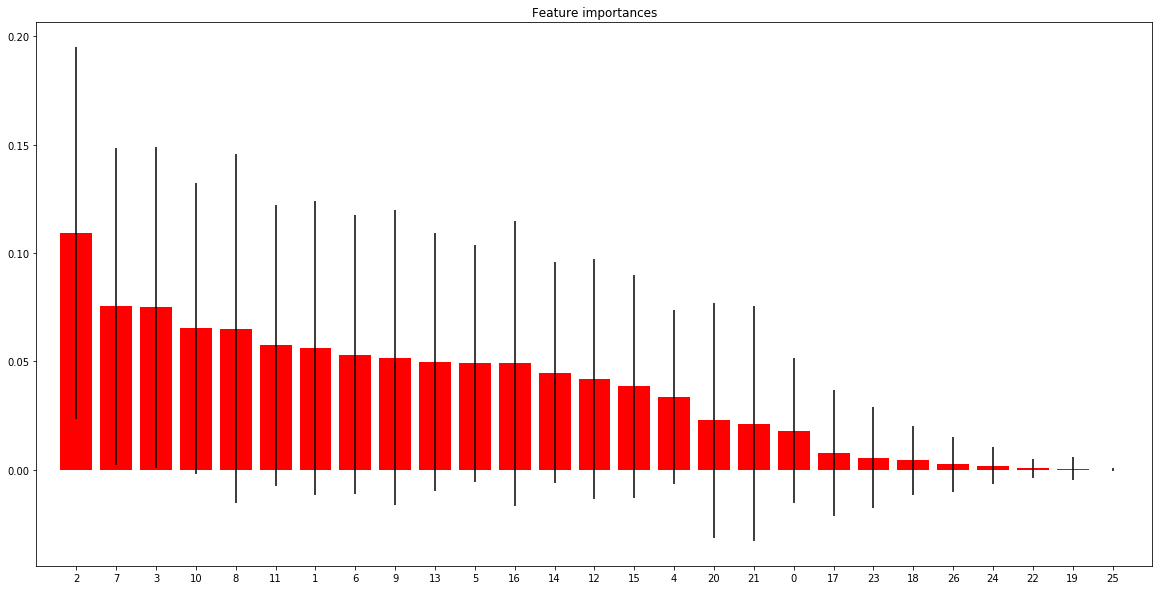

In [119]:
# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
      color="r", yerr=std[indices], align="center", )
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [120]:

df = pd.DataFrame(data = train_data_copy.columns.values, index=range(24), columns=['Feature_Name'])
df

,Feature_Name
0,rally
1,hitpoint
2,speed
3,netClearance
4,distance.from.sideline
5,depth
6,outsideSideline
7,outsideBaseline
8,player.distance.travelled
9,player.impact.depth


# Basically all attributes are important : as shown by this model
## Continue with Gradient Descent in -
## FileName : Cute7305Model_4_GBM

In [35]:
# Trying different base Estimator

# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

# Import Support Vector Classifier  --> NOT TAUGHT YET!!
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

svc=SVC(probability=True, kernel='poly')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=60, base_estimator=svc, learning_rate=1.0)


In [ ]:
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)
# TAKING TOO MUCH TIME, WILL TRY ONCE TAUGHT IN CLASS.

In [ ]:
#Predict the response for test dataset
y_pred_svc = model.predict(X_test)
y_pred_svc

In [ ]:
#Reverse factorize (converting y_pred from 0s,1s and 2s to W, UE, FE

reversefactor = dict(zip(range(3),definitions))
y_test = np.vectorize(reversefactor.get)(y_test)
y_pred_svc = np.vectorize(reversefactor.get)(y_pred_svc)

In [ ]:
y_pred_svc

In [ ]:
y_test

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))